<a href="https://colab.research.google.com/github/Frknslmn50/EADIR_23L/blob/master/HOMEWORK_A_FURKANSALMAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
!gdown --id 1iAk5i9waKawkM22jvExx6D1kWEjaB_nk

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iAk5i9waKawkM22jvExx6D1kWEjaB_nk
To: /content/dog.jpg
100% 6.41k/6.41k [00:00<00:00, 7.82MB/s]


1.Write a Python program to find shortest list of values with the keys in a given dictionary.

Original Dictionary: {'1': [10, 12], '2': [10], '3': [10, 20, 30, 40], '4': [20], '5': [10, 30, 50, 70], '6': [80]} 

Shortest list of values with the keys of the said dictionary: ['2', '4', '6']

In [3]:
import sys
def shortest_key_list(d):
  keys = []
  min = sys.maxsize
  for key in d:
    if(len(d[key])<min):
      min = len(d[key])
  for key in d:
    if(len(d[key])==min):
      keys.append(key)
  return keys

In [4]:
d = {'1': [10, 12], '2': [10], '3': [10, 20, 30, 40], '4': [20], '5': [10, 30, 50, 70], '6': [80]}
print(f"Shortest list of values with the keys of the said dictionary:{shortest_key_list(d)}")

Shortest list of values with the keys of the said dictionary:['2', '4', '6']


2.Write a Python program to generate a new dictionary with the key and value shifted. 

Original Dictionary:
{1: 'red', 2: 'green', 3: 'black', 4: 'white', 5: 'black'}

Converted Dictionary:
{'red':1 , 'green': 2, 'black': 3, 'white': 4, 'black': 5}


In [5]:
def shift_key_vals(old_dict):
  new_dict = {}
  for key in old_dict:
    new_dict[old_dict[key]] = key
  return new_dict

In [6]:
old_dict = {1: 'red', 2: 'green', 3: 'black', 4: 'white', 5: 'black'}
print(f"Converted Dictionary : {shift_key_vals(old_dict)}")
# Output is not as expected because keys of dictionary can't be duplicated.

Converted Dictionary : {'red': 1, 'green': 2, 'black': 5, 'white': 4}


3.Consider 10 32x32 RGB images stored in the matrix shown below. 

1.Write the code to find maximum R value over all images. 

2.Write the code to find minimum G values of each image.

In [7]:
RGB = np.random.rand(32,32,3)*255

In [8]:
print(f"Maximum R value : {np.max(RGB[:,:,0])}") # R value = first channel
RGB_10 = np.random.rand(10,32,32,3)*255
print(f"Minimum G value : {np.min(RGB_10[:,:,:,1])}") # G value = second channel

Maximum R value : 254.63540684998958
Minimum G value : 0.015491832765627822


4.Using PIL and numpy package to devide the 200x200 image into four parts(matrix), top-left, top-right, down-left and down-right. Each of them should be 50x50. Save them as "1.jpg, 2.jpg, 3.jpg, 4.jpg".

Read the 4 parts of the images, combine them to restore the original image.(matrix).

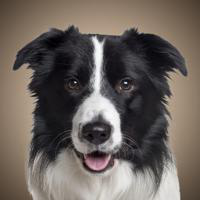

In [9]:
from PIL import Image
image=Image.open("dog.jpg")
image

In [10]:
from numpy import asarray
image_arr = asarray(image)
image_after = Image.fromarray(image_arr)

In [11]:
top_left = image_arr[:101,:101,:]
top_right = image_arr[:101:,101:,:]
down_left = image_arr[101:,:101,:]
down_right = image_arr[101:,101:,:]

In [12]:
top_left_img = Image.fromarray(top_left)
top_right_img = Image.fromarray(top_right)
down_left_img = Image.fromarray(down_left)
down_right_img = Image.fromarray(down_right)

In [13]:
top_left_img.save("1.jpg")
top_right_img.save("2.jpg")
down_left_img.save("3.jpg")
down_right_img.save("4.jpg")

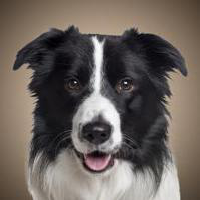

In [14]:
im1_arr = asarray(Image.open("1.jpg"))
im2_arr = asarray(Image.open("2.jpg"))
im3_arr = asarray(Image.open("3.jpg"))
im4_arr = asarray(Image.open("4.jpg"))

top_arr = np.concatenate([im1_arr,im2_arr] , axis=1)
down_arr = np.concatenate([im3_arr,im4_arr] , axis=1)
img_arr = np.concatenate([top_arr,down_arr] , axis=0)
final_img = Image.fromarray(img_arr)
final_img

5. Convert the PIL image format data to numpy array. Use the `as_strided` trick to reshape the original image from 200x200 to 100x100 by skipping one pixel data in the memory.

In [15]:
from numpy.lib.stride_tricks import as_strided

New image shape :  (100, 100, 3)


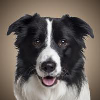

In [16]:
im = Image.open("dog.jpg")
im_arr = asarray(im)
new_shape = (100,100,3)
new_strides = (2*im_arr.strides[0] , 2*im_arr.strides[1] , im_arr.strides[2])
new_arr = as_strided(im_arr , shape = new_shape , strides = new_strides)
print("New image shape : ",new_arr.shape)
new_img = Image.fromarray(new_arr)
new_img

6. Define a sequence $x$ of $m=100$ random $16$ bit samples (`dtype=np.uint16`). Create for $x$ all signal windows of length $n=10$ each. Assume hop, the overlap of windows is 80\%.

In [17]:
x = np.random.randint(low=0 , high=500,size=100 , dtype=np.uint16)
x_strided= as_strided(x , shape=(46,10) , strides = (4 , 2))# 46 windows because 1 + (100-10)/2 = 46
print("X before windows : \n",x)
print("X after stride opt : \n",x_strided)

X before windows : 
 [457 258 407  79 252 463 212 423 109 367 185 266  89 378 404 436  14 491
 316 164 334 248 463 235  13 190  12 173 252 228  52  74  16 192 217  59
 250  26  34 207 360 126 355 399 284 243 129 342 193 136 274 332 191 304
 306 275  33 141 175  78 259 454 204 274 157 101 300 277 321 479 133 425
 172  21 164  77 274  91  48  66 212 446  27 346  75 135 325 388 141 250
 163 350 235 212 340 418 354 346 312 367]
X after stride opt : 
 [[457 258 407  79 252 463 212 423 109 367]
 [407  79 252 463 212 423 109 367 185 266]
 [252 463 212 423 109 367 185 266  89 378]
 [212 423 109 367 185 266  89 378 404 436]
 [109 367 185 266  89 378 404 436  14 491]
 [185 266  89 378 404 436  14 491 316 164]
 [ 89 378 404 436  14 491 316 164 334 248]
 [404 436  14 491 316 164 334 248 463 235]
 [ 14 491 316 164 334 248 463 235  13 190]
 [316 164 334 248 463 235  13 190  12 173]
 [334 248 463 235  13 190  12 173 252 228]
 [463 235  13 190  12 173 252 228  52  74]
 [ 13 190  12 173 252 228  52  74

7. Mirror the image: Read the `dog.jpg` image, convert it to numpy format, make a hardcopy of the left half side of the dog face using `as_strided ` trick to a new matrix instance. Then replace the right side of the dog face in the original matrix by the mirrored new matrix.

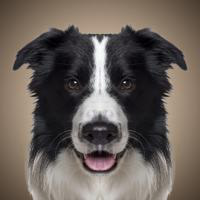

In [18]:
im = Image.open("dog.jpg")
im_arr = asarray(im)
height, width, channels = im_arr.shape
new_shape = (height , width//2 , channels)
left_half = as_strided(im_arr,shape = new_shape , strides = im_arr.strides)
left_img = Image.fromarray(left_half)
left_mirrored = np.fliplr(left_half)
left_mirrored_img = Image.fromarray(left_mirrored)
im_arr[:,(width//2):,:] = left_mirrored
final_img = Image.fromarray(im_arr)
final_img

8. Implement SSIM in the following steps, i.e. write:
The code for the function `gauss_1d` computing the array of type `numpy.ndarray` including coefficients of Gauss 1D.
The code for the function `gauss_2d` computing the array of type `numpy.ndarray` including coefficients of Gauss 2D. 
The code of function `ssim` with input of type `numpy.ndarray` and convolution opeartion via the function  `convolve` imported from `scipy.ndimage`.
* Find the LENA image in the Internet, convolve it with Gaussian mask in the window $11\times 11$, display the results after convolution and compute SSIM for those images.

In [19]:
! gdown https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

Downloading...
From: https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
To: /content/Lenna_%28test_image%29.png
100% 474k/474k [00:00<00:00, 7.57MB/s]


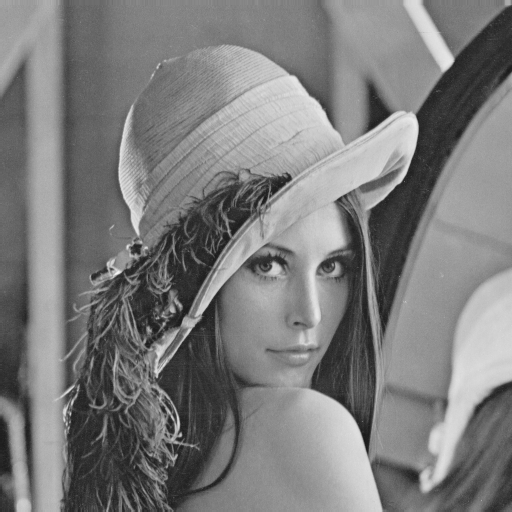

In [20]:
from PIL import Image
LENA=Image.open("/content/Lenna_%28test_image%29.png")
LENA = LENA.convert('L')
LENA

In [21]:
from scipy.ndimage import convolve as conv2d

def gauss_1d(w_s, sigma):
  gauss = np.array([np.exp(-(x - w_s//2)**2/(2*sigma**2))\
                    for x in range(w_s)])
  return gauss/gauss.sum()
def gauss_2d(w_s,sigma=1.5):
  gauss = gauss_1d(w_s,sigma);return np.outer(gauss,gauss)




In [22]:
def ssim(img1, img2, w_s=11, sigma=1.5):
  img1 = img1.astype(float); img2 = img2.astype(float)
  gmask = gauss_2d(w_s,sigma=sigma)
  mu1 = conv2d(img1,gmask); mu2 = conv2d(img2,gmask)
  img1c = img1-mu1; img2c = img2-mu2 
  sigma1_sq = conv2d(img1c**2, gmask)
  sigma2_sq = conv2d(img2c**2, gmask)
  sigma12 = conv2d(img1c*img2c, gmask)
  ssim_map = ((2*mu1*mu2+0.0001)*(2*sigma12+0.0009))/\
    ((mu1**2+mu2**2+0.0001)*(sigma1_sq+sigma2_sq+0.0009))
  return ssim_map.mean()

In [24]:
LENA_arr = asarray(LENA)
print(LENA_arr.shape)
lena = Image.open("lena.png")
lena = lena.convert("L")
lena_arr = asarray(lena)
ssim(LENA_arr , lena_arr)

(512, 512)


1.0